# Data Wrangling

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

### Loading and exploring our dataset:

In [2]:
df = pd.read_csv('data/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### A brief description of  each column could be helpful here: 



Column|  Description
---------|----------------
SalePrice | the property's sale price in dollars. This is the target variable that you're trying to predict.
MSSubClass| The building class
MSZoning| The general zoning classification
LotFrontage | Linear feet of street connected to property
LotArea | Lot size in square feet
Street | Type of road access
Alley | Type of alley access
LotShape | General shape of property
LandContour | Flatness of the property
Utilities | Type of utilities available
LotConfig | Lot configuration
LandSlope | Slope of property
Neighborhood | Physical locations within Ames city limits
Condition1 | Proximity to main road or railroad
Condition2 | Proximity to main road or railroad (if a second is present)
BldgType | Type of dwelling
HouseStyle | Style of dwelling
OverallQual | Overall material and finish quality
OverallCond | Overall condition rating
YearBuilt | Original construction date
YearRemodAdd | Remodel date
RoofStyle | Type of roof
RoofMatl | Roof material
Exterior1st | Exterior covering on house
Exterior2nd | Exterior covering on house (if more than one material)
MasVnrType | Masonry veneer type
MasVnrArea | Masonry veneer area in square feet
ExterQual | Exterior material quality
ExterCond | Present condition of the material on the exterior
Foundation | Type of foundation
BsmtQual | Height of the basement
BsmtCond | General condition of the basement
BsmtExposure | Walkout or garden level basement walls
BsmtFinType1 | Quality of basement finished area
BsmtFinSF1 | Type 1 finished square feet
BsmtFinType2 | Quality of second finished area (if present)
BsmtFinSF2 | Type 2 finished square feet
BsmtUnfSF | Unfinished square feet of basement area
TotalBsmtSF | Total square feet of basement area
Heating | Type of heating
HeatingQC | Heating quality and condition
CentralAir | Central air conditioning
Electrical | Electrical system
1stFlrSF | First Floor square feet
2ndFlrSF | Second floor square feet
LowQualFinSF | Low quality finished square feet (all floors)
GrLivArea | Above grade (ground) living area square feet
BsmtFullBath | Basement full bathrooms
BsmtHalfBath | Basement half bathrooms
FullBath | Full bathrooms above grade
HalfBath | Half baths above grade
Bedroom | Number of bedrooms above basement level
Kitchen | Number of kitchens
KitchenQual | Kitchen quality
TotRmsAbvGrd | Total rooms above grade (does not include bathrooms)
Functional | Home functionality rating
Fireplaces | Number of fireplaces
FireplaceQu | Fireplace quality
GarageType | Garage location
GarageYrBlt | Year garage was built
GarageFinish | Interior finish of the garage
GarageCars | Size of garage in car capacity
GarageArea | Size of garage in square feet
GarageQual | Garage quality
GarageCond | Garage condition
PavedDrive | Paved driveway
WoodDeckSF | Wood deck area in square feet
OpenPorchSF | Open porch area in square feet
EnclosedPorch | Enclosed porch area in square feet
3SsnPorch | Three season porch area in square feet
ScreenPorch | Screen porch area in square feet
PoolArea | Pool area in square feet
PoolQC | Pool quality
Fence | Fence quality
MiscFeature | Miscellaneous feature not covered in other categories
MiscVal | $Value of miscellaneous feature 
MoSold | Month Sold 
YrSold | Year Sold 
SaleType | Type of sale
SaleCondition |  Condition of sale

In [4]:
print('Our dataset has {} rows and {} columns'.format(df.shape[0],df.shape[1]))

Our dataset has 1460 rows and 81 columns


___

### Exploring missing values: 

In [5]:
#checking missing values by column 
def percentageOfnull(df):
    nan_count = df.isna().sum().sort_values(ascending=False)
    nan_percentage = ((df.isna().sum()/df.isna().count())*100).sort_values(ascending=False)
    train_test_dtype = df.dtypes
    df_info = pd.concat([nan_count,nan_percentage,train_test_dtype],axis=1,keys=['Null Count','Null Percentage %','DataTypes'])
    return df_info[df_info['Null Count']>0]

In [6]:
percentageOfnull(df)

,Null Count,Null Percentage %,DataTypes
PoolQC,1453,99.520548,object
MiscFeature,1406,96.301370,object
Alley,1369,93.767123,object
Fence,1179,80.753425,object
FireplaceQu,690,47.260274,object
LotFrontage,259,17.739726,float64
GarageYrBlt,81,5.547945,float64
GarageCond,81,5.547945,object
GarageType,81,5.547945,object
GarageFinish,81,5.547945,object


___

### Exploring unique values per column:

In [7]:
#checking number of unique values in the catogarical columns
unique_catagorical_values =df.select_dtypes(object).nunique()
unique_catagorical_values

MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64

In [8]:
#This table displays the distinct value count, and the distinct values of each categorical column
x = pd.Series({col:df[col].unique() for col in df})
y = pd.concat([unique_catagorical_values, x],axis =1, keys = ['number_of_distinct_values','distinct_values'])
y = y[y.number_of_distinct_values.notnull()]
y

,number_of_distinct_values,distinct_values
MSZoning,5.0,"[RL, RM, C (all), FV, RH]"
Street,2.0,"[Pave, Grvl]"
Alley,2.0,"[nan, Grvl, Pave]"
LotShape,4.0,"[Reg, IR1, IR2, IR3]"
LandContour,4.0,"[Lvl, Bnk, Low, HLS]"
Utilities,2.0,"[AllPub, NoSeWa]"
LotConfig,5.0,"[Inside, FR2, Corner, CulDSac, FR3]"
LandSlope,3.0,"[Gtl, Mod, Sev]"
Neighborhood,25.0,"[CollgCr, Veenker, Crawfor, NoRidge, Mitchel, ..."
Condition1,9.0,"[Norm, Feedr, PosN, Artery, RRAe, RRNn, RRAn, ..."


___

### Dropping redundant and mostly missing columns:

In [9]:
df = df.drop(columns=['Id','PoolQC','MiscFeature','Alley','MiscVal'])

___

### Handling missing values:

In [10]:
df['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

From the data_description file we see that missing values in 'Fence' mean that the house deosn't have a fence.

In [11]:
df['Fence'] = df['Fence'].replace(to_replace = pd.NA, value= 'none')

The same reasoning applies to the following columns:

In [12]:
df['FireplaceQu'] = df['FireplaceQu'].replace(to_replace = pd.NA, value= 'none')
df['LotFrontage'] = df['LotFrontage'].replace(to_replace = pd.NA, value= 0)
df['GarageYrBlt'] = df['GarageYrBlt'].replace(to_replace = pd.NA, value= 0)
df['GarageCond'] = df['GarageCond'].replace(to_replace = pd.NA, value= 'none')
df['GarageType'] = df['GarageType'].replace(to_replace = pd.NA, value= 'none')
df['GarageFinish'] = df['GarageFinish'].replace(to_replace = pd.NA, value= 'none')
df['GarageQual'] = df['GarageQual'].replace(to_replace = pd.NA, value= 'none')
df['BsmtFinType2'] = df['BsmtFinType2'].replace(to_replace = pd.NA, value= 'none')
df['BsmtExposure'] = df['BsmtExposure'].replace(to_replace = pd.NA, value= 'none')
df['BsmtQual'] = df['BsmtQual'].replace(to_replace = pd.NA, value= 'none')
df['BsmtCond'] = df['BsmtCond'].replace(to_replace = pd.NA, value= 'none')
df['BsmtFinType1'] = df['BsmtFinType1'].replace(to_replace = pd.NA, value= 'none')
df['MasVnrArea'] = df['MasVnrArea'].replace(to_replace = np.NaN, value= 0)
df['MasVnrType'] = df['MasVnrType'].replace(to_replace = pd.NA, value= 'none')

In [13]:
df['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

We will use the mode of 'Electrical' to fill the one missing value in that column:

In [14]:
df['Electrical'] = df['Electrical'].replace(to_replace = pd.NA, value= 'SBrkr')

In [15]:
percentageOfnull(df)

,Null Count,Null Percentage %,DataTypes
LotFrontage,259,17.739726,float64
GarageYrBlt,81,5.547945,float64


In [16]:
df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

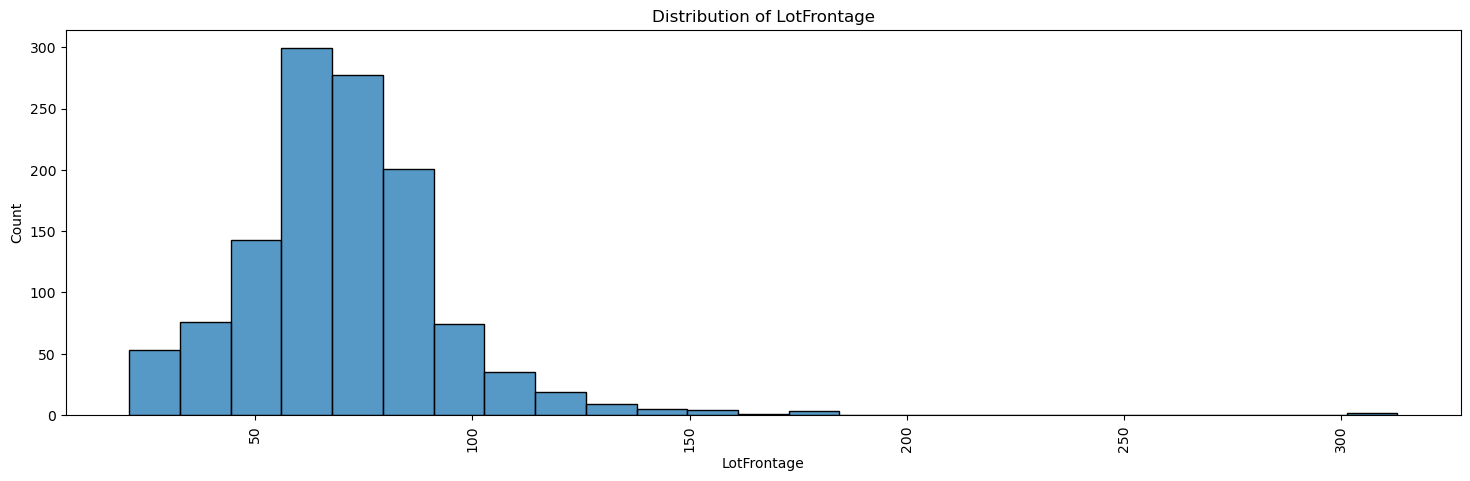

In [17]:
plt.figure(figsize = (18,5))
plt.xticks(rotation=90)
plt.title('Distribution of LotFrontage')
sns.histplot(data = df, x = df['LotFrontage'],bins=25);

Since the 'LotFrontage' column doesn't contain any 0 values, we'll assume the missing values are supposed to be zeros:

In [18]:
df['LotFrontage'] = df['LotFrontage'].replace(to_replace = np.NaN, value= 0)

In [19]:
percentageOfnull(df)

,Null Count,Null Percentage %,DataTypes
GarageYrBlt,81,5.547945,float64


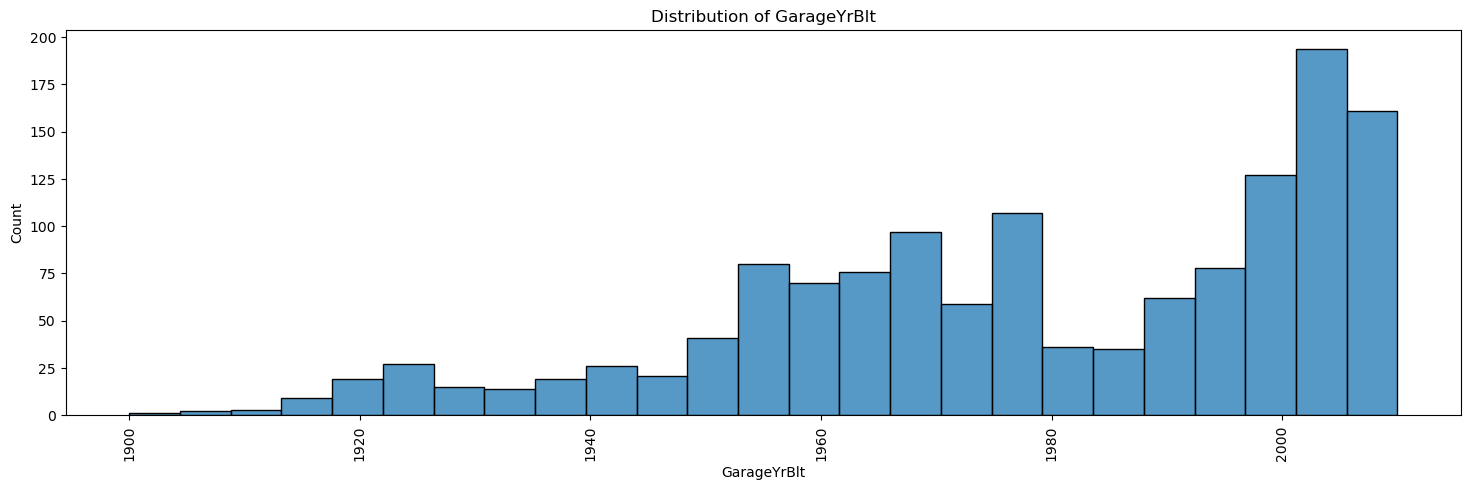

In [20]:
plt.figure(figsize = (18,5))
plt.xticks(rotation=90)
plt.title('Distribution of GarageYrBlt')
sns.histplot(data = df, x = df['GarageYrBlt'],bins=25);

Since 'GarageYrBlt' has a skewed distribution, we will use the median to fill in the missing values:

In [21]:
df['GarageYrBlt'].fillna(df['GarageYrBlt'].median(),inplace = True)

___

### Missing values by row:


In [22]:
missing = pd.concat([df.isnull().sum(axis=1), 100 * df.isnull().mean(axis=1)], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False).head(10)

,count,%
0,0,0.0
981,0,0.0
979,0,0.0
978,0,0.0
977,0,0.0
976,0,0.0
975,0,0.0
974,0,0.0
973,0,0.0
972,0,0.0


___

### Summary statistics:

### SalePrice:

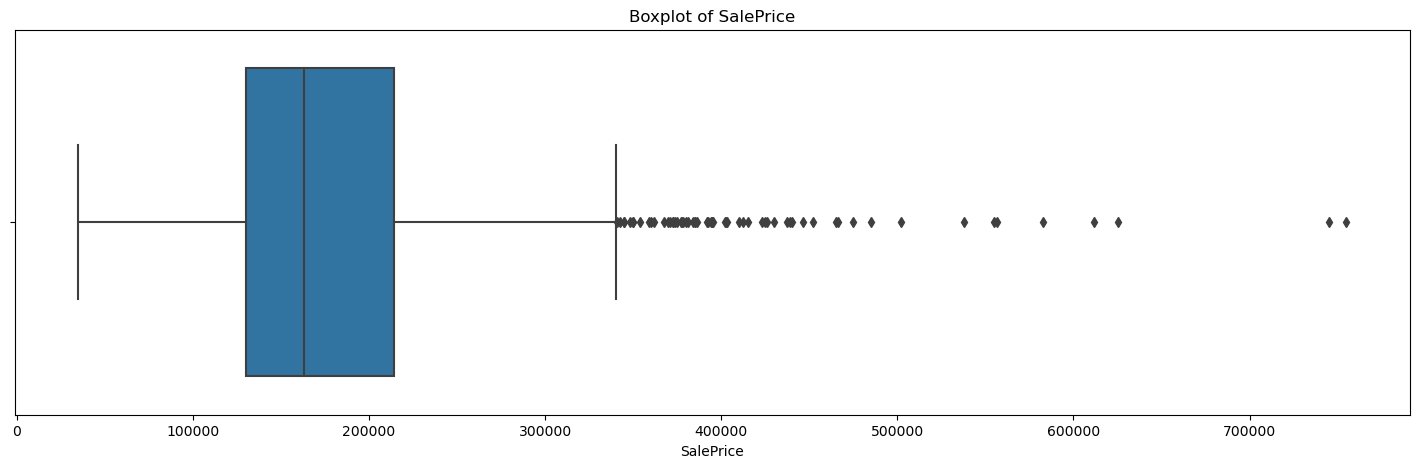

In [23]:
plt.figure(figsize=(18,5))
plt.title('Boxplot of SalePrice')
sns.boxplot(data = df, x = 'SalePrice');

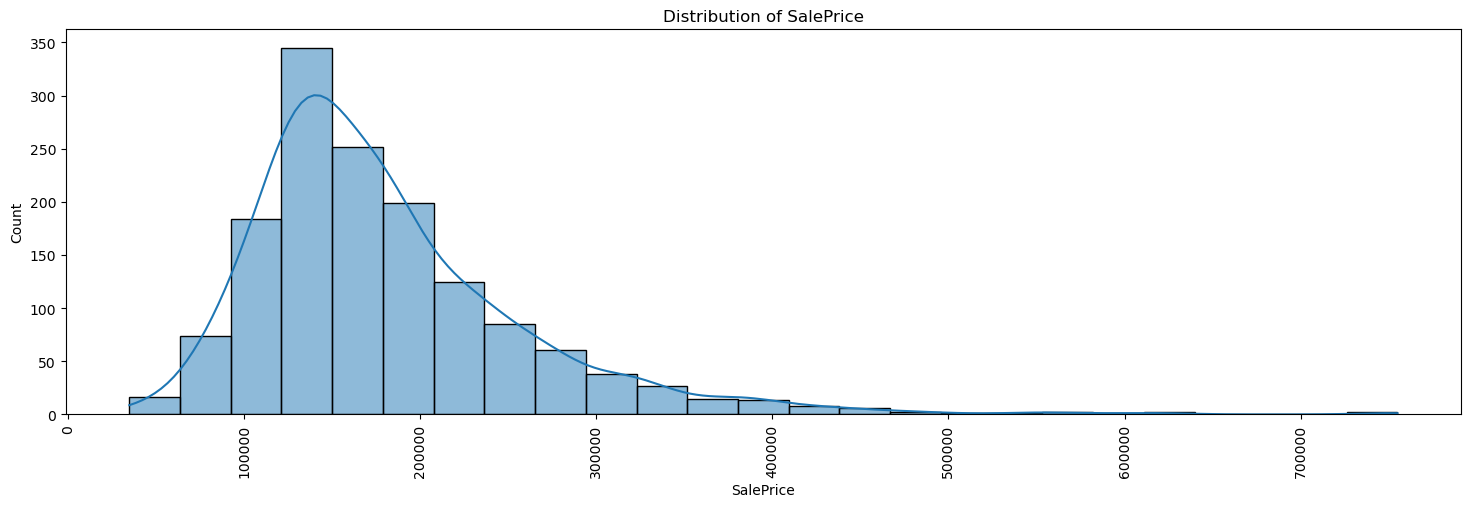

In [24]:
plt.figure(figsize = (18,5))
plt.xticks(rotation=90)
plt.title('Distribution of SalePrice')
sns.histplot(data = df, x = df['SalePrice'],bins=25, kde = True);

In [25]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

### Data distributions:

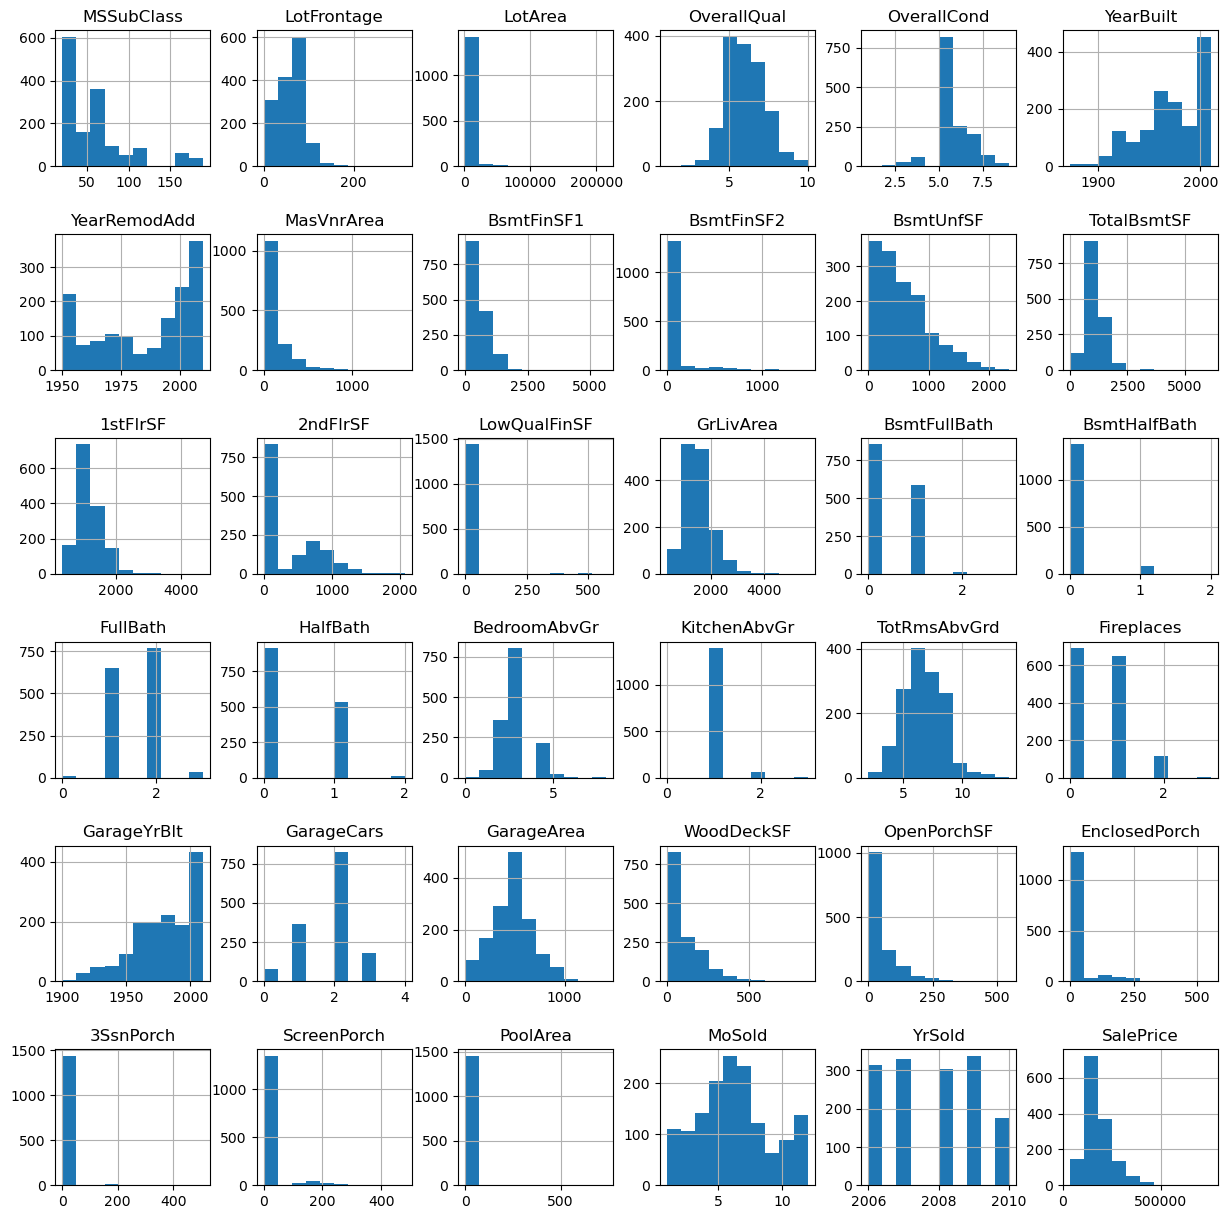

In [26]:
df.hist(figsize=(15,15))
plt.subplots_adjust(hspace=0.5);

### Inspecting outliers:

In [27]:
df['LotArea'].describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

In [28]:
df[df['LotArea']==215245][['BldgType','SalePrice','LotArea']]

,BldgType,SalePrice,LotArea
313,1Fam,375000,215245


This row is most likely a mistake, we'll drop it:

In [29]:
df.drop(index = 313, axis = 0, inplace = True)

In [30]:
df['YearBuilt'].describe()

count    1459.000000
mean     1971.272104
std        30.212814
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

___

### Inspecting data types:

'MSSubClass' is a categorical column that identifies the type of dwelling involved in the sale. For example: </br>

- 20	1-STORY 1946 & NEWER ALL STYLES
- 30	1-STORY 1945 & OLDER
- 40	1-STORY W/FINISHED ATTIC ALL AGES
- ...

In [29]:
df['MSSubClass'].value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [30]:
df['MSSubClass'] = df['MSSubClass'].astype(str)

We will convert 'OverallQual' and 'OverallCond' to string ratings, and handle the rest of the type casting in this cell:

In [31]:
dictionary = { 10:'Very Excellent',9:'Excellent',8:'Very Good',7:'Good',6:
              'Above Average',5:'Average',4:'Below Average',3:'Fair',2:'Poor',1:'very poor'}
df['OverallQual'] = df['OverallQual'].replace(dictionary)
df['OverallCond'] = df['OverallQual'].replace(dictionary)
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)
df['GarageYrBlt'] = df['GarageYrBlt'].astype(str)
df['YearBuilt'] = df['YearBuilt'].astype(str)
df['YearRemodAdd'] = df['YearRemodAdd'].astype(str)